**author**: lukethompson@gmail.com<br>
**date**: 7 Oct 2017<br>
**language**: Python 3.5<br>
**license**: BSD3<br>

## alpha_diversity_boxplots.ipynb

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import functools
import matplotlib.pyplot as plt
import empcolors

In [2]:
colors = ['grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
sns.set_palette(colors)

In [3]:
path_map = '../../data/mapping-files/emp_qiime_mapping_qc_filtered.tsv'
path_nsti_ko = '../../data/alpha-div/nsti_per_sample.tsv'
path_savefig = '.'

path_gg_100k = '../../data/alpha-div/cr_otus_greengenes_100000.txt'
path_gg_30k = '../../data/alpha-div/cr_otus_greengenes_30000.txt'
path_gg_10k = '../../data/alpha-div/cr_otus_greengenes_10000.txt'
path_gg_1k = '../../data/alpha-div/cr_otus_greengenes_1000.txt'
path_silva_100k = '../../data/alpha-div/cr_otus_silva_100000.txt'
path_silva_30k = '../../data/alpha-div/cr_otus_silva_30000.txt'
path_silva_10k = '../../data/alpha-div/cr_otus_silva_10000.txt'
path_silva_1k = '../../data/alpha-div/cr_otus_silva_1000.txt'

In [4]:
def boxplot_jitter_sorted(df, x_cat, y_cat, sub_cat, sub_value, y_max, x_size=8.7, y_size=5, y_label_off=False):
    myfontsize = 12
    fig = plt.figure(figsize=(x_size, y_size)) # df[x_cat][df[sub_cat] == sub_value].value_counts().shape[0]
    sns.boxplot(fliersize=0, x=x_cat, y=y_cat, linewidth=1, data=df[df[sub_cat] == sub_value], order=df[df[sub_cat] == sub_value].groupby([x_cat]).mean().sort_values(by=y_cat).index.tolist())
    sns.stripplot(jitter=True, x=x_cat, y=y_cat, data=df[df[sub_cat] == sub_value], order=df[df[sub_cat] == sub_value].groupby([x_cat]).mean().sort_values(by=y_cat).index.tolist(), color='black', size=1)
    plt.xticks(rotation=45, ha='right', fontsize=myfontsize)
    plt.yticks(fontsize=myfontsize)
    plt.xlabel('')
    plt.ylim(0, y_max)
    if (y_cat == 'adiv_observed_otus'):
        plt.ylabel('Observed tag sequences', fontsize=myfontsize) # (identical 90-bp V4 16S rRNA)
    # optionally turn off y-ticks and y-labels
    if y_label_off:
        plt.yticks(plt.yticks()[0], len(plt.yticks()[0]) * [''])
        plt.ylabel('')
    # plot median
    median = df[df[sub_cat] == sub_value][y_cat].quantile(0.5)
    plt.axhline(y=median, xmin=0, xmax=1, color='y')
    plt.tight_layout()
    fig.patch.set_alpha(0.0)
    plt.savefig('%s/%s_%s_%s.pdf' % (path_savefig, y_cat, x_cat, sub_value))

In [5]:
# import files
df_map = pd.read_csv(path_map, sep='\t', index_col=0)
df_nsti_ko = pd.read_csv(path_nsti_ko, sep='\t', index_col=0)

/Users/luke.thompson/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (27,28,29,30,31,32,33,34,35,36,37,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# calculate and add percent Greengenes and Silva coverage
df_map['Greengenes v.13.8'] = df_map['observations_closed_ref_greengenes']/df_map['sequences_split_libraries']
df_map['Silva v.123'] = df_map['observations_closed_ref_silva']/df_map['sequences_split_libraries']

In [7]:
# merge mapping df and nsti_ko scores
df_merged_nsti_ko = pd.merge(df_map, df_nsti_ko, how='inner', left_index=True, right_index=True)
df_merged_nsti_ko = df_merged_nsti_ko[df_merged_nsti_ko['empo_1'] != 'Control']

In [8]:
# import Greengenes & Silva alpha-rarefaction
df_gg_100k = pd.read_csv(path_gg_100k, sep='\t', index_col=0)
df_gg_30k = pd.read_csv(path_gg_30k, sep='\t', index_col=0)
df_gg_10k = pd.read_csv(path_gg_10k, sep='\t', index_col=0)
df_gg_1k = pd.read_csv(path_gg_1k, sep='\t', index_col=0)
df_silva_100k = pd.read_csv(path_silva_100k, sep='\t', index_col=0)
df_silva_30k = pd.read_csv(path_silva_30k, sep='\t', index_col=0)
df_silva_10k = pd.read_csv(path_silva_10k, sep='\t', index_col=0)
df_silva_1k = pd.read_csv(path_silva_1k, sep='\t', index_col=0)

# convert Silva index to lowercase so they are comparable
df_silva_100k.index = [x.lower() for x in df_silva_100k.index]
df_silva_30k.index = [x.lower() for x in df_silva_30k.index]
df_silva_10k.index = [x.lower() for x in df_silva_10k.index]
df_silva_1k.index = [x.lower() for x in df_silva_1k.index]

# make each table the same subset as 100k
subset_100k = list(set(df_gg_100k.index) & set(df_silva_100k.index))
df_gg_100k = df_gg_100k.loc[subset_100k]
df_gg_30k = df_gg_30k.loc[subset_100k]
df_gg_10k = df_gg_10k.loc[subset_100k]
df_gg_1k = df_gg_1k.loc[subset_100k]
df_silva_100k = df_silva_100k.loc[subset_100k]
df_silva_30k = df_silva_30k.loc[subset_100k]
df_silva_10k = df_silva_10k.loc[subset_100k]
df_silva_1k = df_silva_1k.loc[subset_100k]

# name the dataframes
df_gg_100k.name = 'gg_100k'
df_gg_30k.name = 'gg_30k'
df_gg_10k.name = 'gg_10k'
df_gg_1k.name = 'gg_1k'
df_silva_100k.name = 'silva_100k'
df_silva_30k.name = 'silva_30k'
df_silva_10k.name = 'silva_10k'
df_silva_1k.name = 'silva_1k'

# merge
df_PD_whole_tree = pd.DataFrame()
df_chao1 = pd.DataFrame()
df_observed_otus = pd.DataFrame()
df_shannon = pd.DataFrame()
for table in [df_gg_100k, df_gg_30k, df_gg_10k, df_gg_1k, df_silva_100k, df_silva_30k, df_silva_10k, df_silva_1k]:
    df_PD_whole_tree[table.name] = table.PD_whole_tree
    df_chao1[table.name] = table.chao1
    df_observed_otus[table.name] = table.observed_otus
    df_shannon[table.name] = table.shannon

In [9]:
# melt dfs and split variable into gg/silva and rarefaction level
# dictionary to rename
dict_n = {'gg': 'Greengenes v.13.8', 'silva': 'Silva v.123'}
df_pd = pd.melt(df_PD_whole_tree)
df_pd['database'] = [dict_n[x.split('_')[0]] for x in df_pd['variable']]
df_pd['rare_level'] = [x.split('_')[1] for x in df_pd['variable']]
df_ch = pd.melt(df_chao1)
df_ch['database'] = [dict_n[x.split('_')[0]] for x in df_ch['variable']]
df_ch['rare_level'] = [x.split('_')[1] for x in df_ch['variable']]
df_oo = pd.melt(df_observed_otus)
df_oo['database'] = [dict_n[x.split('_')[0]] for x in df_oo['variable']]
df_oo['rare_level'] = [x.split('_')[1] for x in df_oo['variable']]
df_sh = pd.melt(df_shannon)
df_sh['database'] = [dict_n[x.split('_')[0]] for x in df_sh['variable']]
df_sh['rare_level'] = [x.split('_')[1] for x in df_sh['variable']]

### Alpha diversity

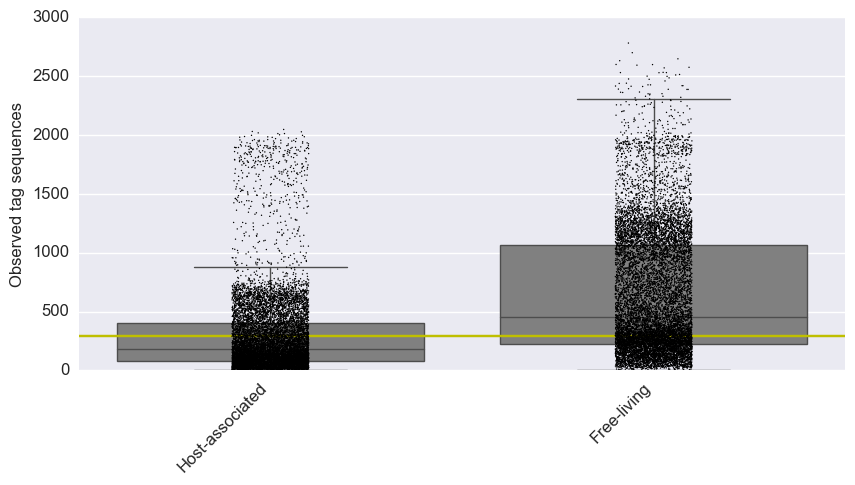

In [10]:
# empo_1 boxplots
boxplot_jitter_sorted(df=df_map, x_cat='empo_1', y_cat='adiv_observed_otus', 
                      sub_cat='empo_0', sub_value='EMP sample', y_max=3000)

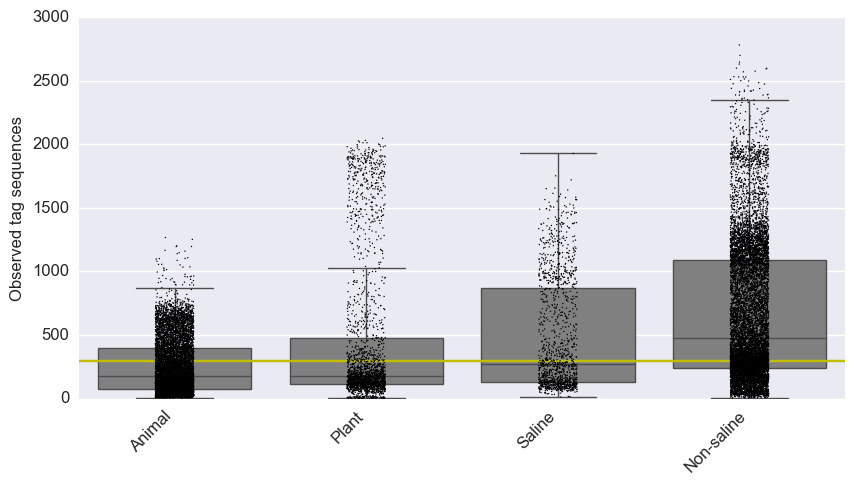

In [11]:
# empo_2 boxplots
boxplot_jitter_sorted(df=df_map, x_cat='empo_2', y_cat='adiv_observed_otus', 
                      sub_cat='empo_0', sub_value='EMP sample', y_max=3000)

#### empo_3 host-associated

In [12]:
# Warning: color palette assumes specific order of box plot!
colorsHA = [empcolors.get_empo_cat_color('Animal corpus'), 
          empcolors.get_empo_cat_color('Plant corpus'), 
          empcolors.get_empo_cat_color('Animal secretion'), 
          empcolors.get_empo_cat_color('Plant surface'), 
          empcolors.get_empo_cat_color('Animal proximal gut'), 
          empcolors.get_empo_cat_color('Animal surface'), 
          empcolors.get_empo_cat_color('Animal distal gut'), 
          empcolors.get_empo_cat_color('Plant rhizosphere'), 
          'white', 
          'white', 
          'white', 
          'white']
sns.set_palette(colorsHA)

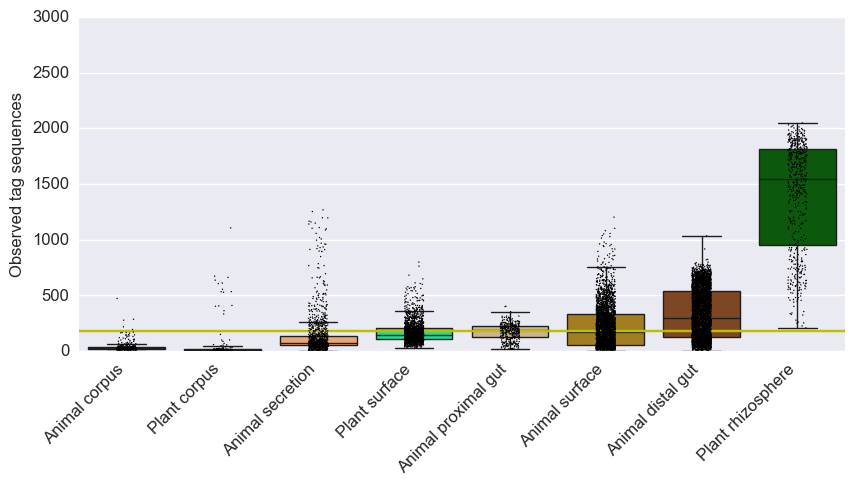

In [13]:
boxplot_jitter_sorted(df=df_map, x_cat='empo_3', y_cat='adiv_observed_otus', 
                      sub_cat='empo_1', sub_value='Host-associated', y_max=3000)

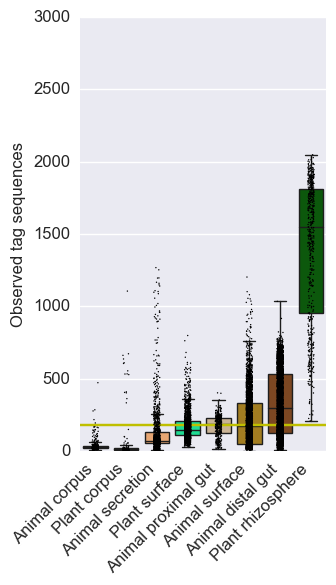

In [14]:
boxplot_jitter_sorted(df=df_map, x_cat='empo_3', y_cat='adiv_observed_otus', 
                      sub_cat='empo_1', sub_value='Host-associated', y_max=3000,
                      x_size=3.5, y_size=6, y_label_off=False)
plt.savefig('~/emp/analyses-adiv/adiv_otus_hostassoc.pdf')

#### empo_3 free-living

In [15]:
# Warning: color palette assumes specific order of box plot!
colorsFL = [empcolors.get_empo_cat_color('Water (saline)'), 
          empcolors.get_empo_cat_color('Aerosol (non-saline)'), 
          empcolors.get_empo_cat_color('Hypersaline (saline)'), 
          'white', 
          empcolors.get_empo_cat_color('Surface (saline)'), 
          empcolors.get_empo_cat_color('Water (non-saline)'), 
          empcolors.get_empo_cat_color('Sediment (saline)'), 
          empcolors.get_empo_cat_color('Soil (non-saline)'), 
          empcolors.get_empo_cat_color('Sediment (non-saline)'), 
          'white', 
          'white', 
          'white']
sns.set_palette(colorsFL)

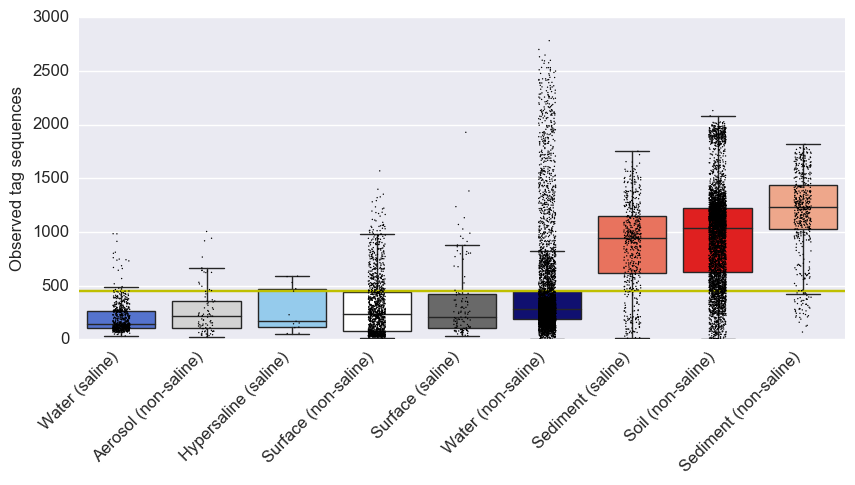

In [16]:
boxplot_jitter_sorted(df=df_map, x_cat='empo_3', y_cat='adiv_observed_otus', 
                      sub_cat='empo_1', sub_value='Free-living', y_max=3000)
# median = df_map[df_map['empo_1'] == 'Free-living']['adiv_observed_otus'].quantile(0.5)
# plt.axhline(y=median, xmin=0, xmax=1, color='y')

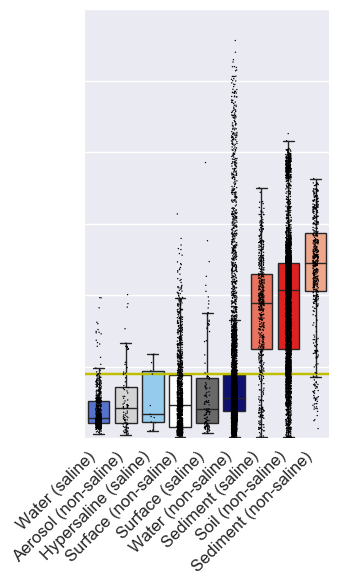

In [17]:
boxplot_jitter_sorted(df=df_map, x_cat='empo_3', y_cat='adiv_observed_otus', 
                      sub_cat='empo_1', sub_value='Free-living', y_max=3000,
                      x_size=3.5, y_size=6, y_label_off=True)
plt.savefig('~/emp/analyses-adiv/adiv_otus_freeliving.pdf')

### Greengenes & Silva coverage

In [18]:
df_coverage = df_map[['empo_3', 'Greengenes v.13.8', 'Silva v.123']]
df_coverage.reset_index(inplace=True)
df_coverage = pd.melt(df_coverage, id_vars=['#SampleID', 'empo_3'], value_vars=['Greengenes v.13.8', 'Silva v.123'])
df_coverage.sort_values('empo_3', inplace=True)

In [19]:
# order by median value
boxorder = df_coverage.groupby('empo_3').quantile(0.5).sort_values('value', ascending=False).index

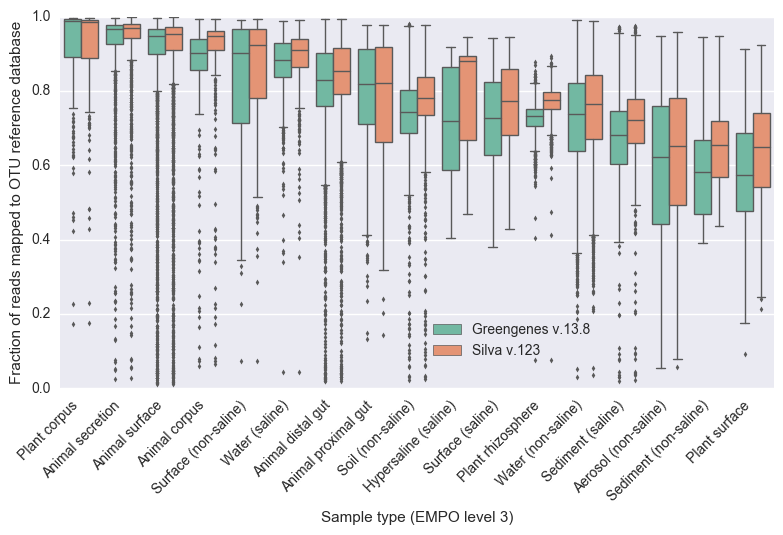

In [20]:
sns.boxplot(x='empo_3', y='value', hue='variable', data=df_coverage, fliersize=3,
            palette=sns.color_palette(['#67C3A6', '#F68C63']), linewidth=1,
            order=boxorder)
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.xlabel('Sample type (EMPO level 3)', fontsize=15)
plt.yticks(fontsize=13)
plt.ylabel('Fraction of reads mapped', fontsize=15)
plt.legend(bbox_to_anchor=(0.65, 0.21), fontsize=12)
plt.tight_layout()
plt.savefig('%s/gg_silva_coverage.pdf' % path_savefig)

### Greengenes & Silva alpha-rarefaction

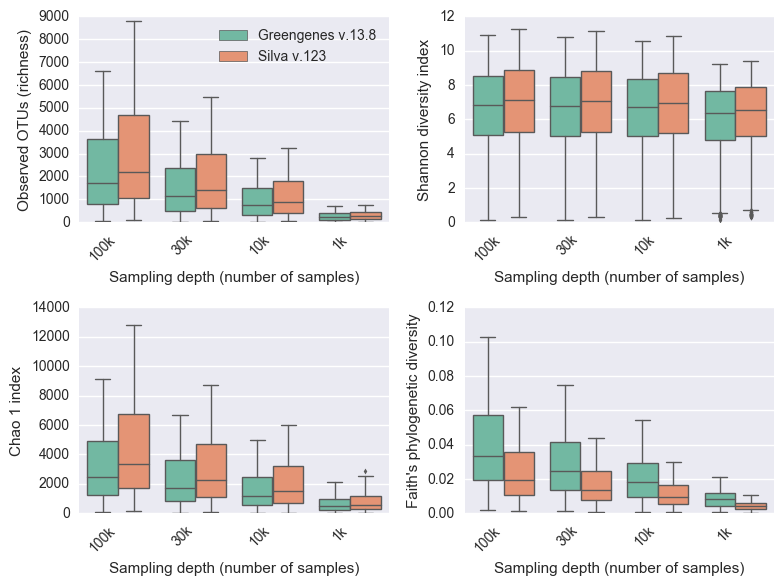

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

plt.subplot(221)
sns.boxplot(x='rare_level', y='value', hue='database', data=df_oo, fliersize=3,
            palette=sns.color_palette(['#67C3A6', '#F68C63']), linewidth=1)
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.xlabel('Sequencing depth', fontsize=15)
plt.yticks(fontsize=13)
plt.ylabel('Observed OTUs', fontsize=15)
plt.legend(loc=1, fontsize=12)

plt.subplot(222)
sns.boxplot(x='rare_level', y='value', hue='database', data=df_sh, fliersize=3,
            palette=sns.color_palette(['#67C3A6', '#F68C63']), linewidth=1)
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.xlabel('Sequencing depth', fontsize=15)
plt.yticks(fontsize=13)
plt.ylabel('Shannon diversity index', fontsize=15)
plt.legend().set_visible(False)

plt.subplot(223)
sns.boxplot(x='rare_level', y='value', hue='database', data=df_ch, fliersize=3,
            palette=sns.color_palette(['#67C3A6', '#F68C63']), linewidth=1)
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.xlabel('Sequencing depth', fontsize=15)
plt.yticks(fontsize=13)
plt.ylabel('Chao 1 index', fontsize=15)
plt.legend().set_visible(False)

plt.subplot(224)
sns.boxplot(x='rare_level', y='value', hue='database', data=df_pd, fliersize=3,
            palette=sns.color_palette(['#67C3A6', '#F68C63']), linewidth=1)
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.xlabel('Sequencing depth', fontsize=15)
plt.yticks(fontsize=13)
plt.ylabel("Faith's PD", fontsize=15)
plt.legend().set_visible(False)

plt.tight_layout()
plt.savefig('%s/gg_silva_alpha_rare.pdf' % path_savefig)

### NSTI scores

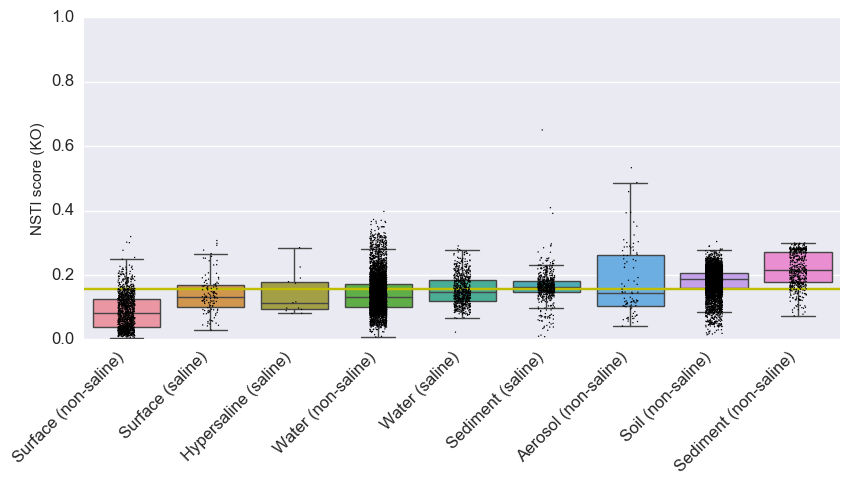

In [22]:
# nsti empo_3 boxplots (free-living)
sns.set_palette('Blues')
boxplot_jitter_sorted(df=df_merged_nsti_ko, x_cat='empo_3', y_cat='NSTI', 
                      sub_cat='empo_1', sub_value='Free-living', y_max=1)
plt.ylabel('NSTI score (KO)')

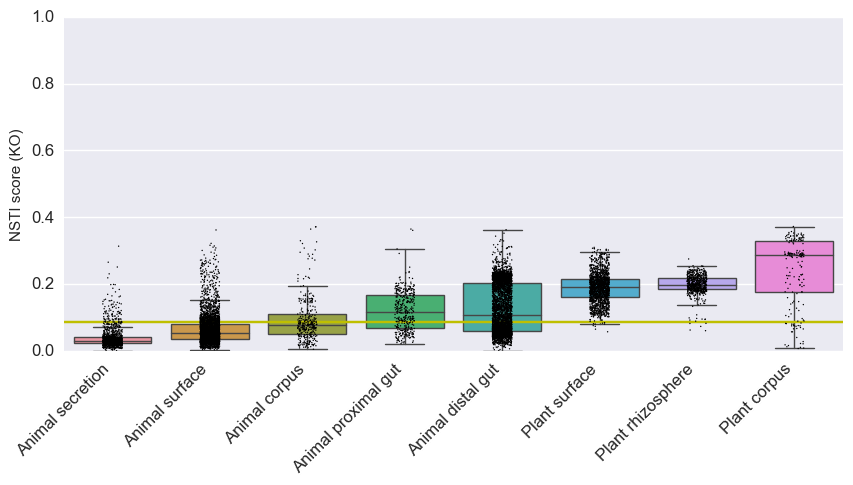

In [23]:
# nsti empo_3 boxplots (host-associated)
boxplot_jitter_sorted(df=df_merged_nsti_ko, x_cat='empo_3', y_cat='NSTI', 
                      sub_cat='empo_1', sub_value='Host-associated', y_max=1)
plt.ylabel('NSTI score (KO)')